# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 19

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,28,30.652314,3.5,3.831539,NaN,37.550732,1.892262
475,Sá,Wolves,51,18.0,83,74.449994,4.6,4.136111,3.644482,35.461677,1.831501
270,de Gea,Manchester Utd,51,17.0,71,68.973389,4.2,4.057258,5.876124,41.156730,1.796584
408,Fabianski,West Ham,50,18.0,66,71.446362,3.7,3.969242,5.419194,42.512900,1.775099
80,Raya,Brentford,43,9.0,34,33.101146,3.8,3.677905,NaN,39.106562,1.773643
353,Lloris,Tottenham,54,16.0,71,64.891805,4.4,4.055738,3.658343,42.483965,1.745312
146,Guaita,Crystal Palace,46,16.0,54,59.185723,3.4,3.699108,3.728953,41.210338,1.724718
559,Ramsdale,Arsenal,52,16.0,83,62.782206,5.2,3.923888,4.903098,28.077274,1.720739
556,Fernández,Brentford,45,8.0,23,28.867685,2.9,3.608461,3.771189,41.055151,1.701045


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,36.928391,9.0,6.154732,NaN,42.364694,2.600849
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,9.084502,42.765125,2.481689
256,Cancelo,Manchester City,69,18.0,113,108.039818,6.3,6.002212,6.336854,36.069452,2.285003
122,Alonso,Chelsea,57,13.0,63,64.199680,4.8,4.938437,5.334553,34.785638,2.068484
142,James,Chelsea,64,15.0,90,78.098477,6.0,5.206565,4.614553,33.966058,2.058076
370,Reguilón,Tottenham,53,15.0,70,68.330317,4.7,4.555354,3.124974,41.786613,1.978720
364,Davies,Tottenham,45,7.0,29,28.963414,4.1,4.137631,6.071053,34.331192,1.950498
252,Stones,Manchester City,53,6.0,32,26.780939,5.3,4.463490,4.809675,24.898983,1.938816
245,Tsimikas,Liverpool,37,7.0,30,26.045246,4.3,3.720749,0.000000,28.951534,1.934326


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.267823,6.5,6.316956,NaN,31.976135,2.440453
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,6.409438,46.362981,2.191471
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,5.456483,41.587291,2.056256
266,Rodrigo,Manchester City,55,12.0,51,57.781470,3.2,4.815122,1.939159,38.549752,2.053175
250,Gündogan,Manchester City,73,13.0,69,71.773675,5.3,5.521052,4.450076,36.543822,2.043433
265,Foden,Manchester City,81,12.0,62,68.074470,5.2,5.672872,5.860856,46.687448,1.993244
210,Tielemans,Leicester City,64,13.0,69,62.650897,5.3,4.819300,6.541092,41.960623,1.904995
144,Gallagher,Crystal Palace,61,17.0,91,78.782458,5.4,4.634262,4.065887,40.179000,1.876358
196,Raphinha,Leeds United,65,16.0,82,75.489076,5.1,4.718067,5.467662,38.170742,1.850578


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540,7.7,8.513333,NaN,38.647413,3.028908
450,Dennis,Watford,60,15.0,84,63.326,5.6,4.221733,4.600000,41.718092,1.723515
468,King,Watford,58,14.0,56,58.033,4.0,4.145214,2.650000,39.278458,1.721207
189,Bamford,Leeds United,77,6.0,25,27.142,4.2,4.523667,2.000000,37.944802,1.630216
413,Antonio,West Ham,77,17.0,80,76.875,4.7,4.522059,3.442750,47.999233,1.629637
263,Jesus,Manchester City,87,15.0,65,71.597,4.3,4.773133,4.123667,36.721486,1.618244
78,Toney,Brentford,66,15.0,56,60.782,3.7,4.052133,2.000000,38.999551,1.577291
307,Saint-Maximin,Newcastle Utd,66,19.0,74,72.984,3.9,3.841263,3.620000,38.781489,1.495210
525,A.Armstrong,Southampton,58,15.0,47,52.613,3.1,3.507533,1.200000,36.902118,1.456424


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,38.647413,3.028908
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,46.362981,2.191471
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,42.765125,2.481689
268,Torres,Manchester City,67,4.0,26,25.267823,6.5,6.316956,31.976135,2.440453
544,Branthwaite,Everton,40,1.0,9,6.297786,9.0,6.297786,40.768792,3.148893
135,Chilwell,Chelsea,56,6.0,54,36.928391,9.0,6.154732,42.364694,2.600849
256,Cancelo,Manchester City,69,18.0,113,108.039818,6.3,6.002212,36.069452,2.285003
253,Mendy,Manchester City,52,1.0,3,5.896823,3.0,5.896823,32.155910,2.585928
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,41.587291,2.056256


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,7.7,8.513333,NaN,38.647413,3.028908
135,Chilwell,Chelsea,56,6.0,9.0,6.154732,NaN,42.364694,2.600849
237,Alexander-Arnold,Liverpool,83,16.0,7.9,7.149678,9.084502,42.765125,2.481689
268,Torres,Manchester City,67,4.0,6.5,6.316956,NaN,31.976135,2.440453
256,Cancelo,Manchester City,69,18.0,6.3,6.002212,6.336854,36.069452,2.285003
233,Salah,Liverpool,130,18.0,9.4,7.901461,6.409438,46.362981,2.191471
122,Alonso,Chelsea,57,13.0,4.8,4.938437,5.334553,34.785638,2.068484
142,James,Chelsea,64,15.0,6.0,5.206565,4.614553,33.966058,2.058076
240,Jota,Liverpool,81,17.0,5.5,5.852206,5.456483,41.587291,2.056256


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,NaN,38.647413,3.028908
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,6.852667,46.362981,2.191471
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,7.890557,42.765125,2.481689
268,Torres,Manchester City,67,4.0,26,25.267823,6.5,6.316956,NaN,31.976135,2.440453
135,Chilwell,Chelsea,56,6.0,54,36.928391,9.0,6.154732,6.995690,42.364694,2.600849
256,Cancelo,Manchester City,69,18.0,113,108.039818,6.3,6.002212,6.521600,36.069452,2.285003
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,6.024035,41.587291,2.056256
265,Foden,Manchester City,81,12.0,62,68.074470,5.2,5.672872,4.858270,46.687448,1.993244
250,Gündogan,Manchester City,73,13.0,69,71.773675,5.3,5.521052,5.343621,36.543822,2.043433


In [23]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 20 prediction,valuePoints metric
id,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,36.928391,9.0,6.154732,5.382999,2.600849
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,5.319105,2.191471
413,Antonio,West Ham,77,17.0,80,76.875000,4.7,4.522059,5.167022,1.629637
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,5.108371,2.481689
138,Mount,Chelsea,77,16.0,89,82.146594,5.6,5.134162,5.107860,1.850224
544,Branthwaite,Everton,40,1.0,9,6.297786,9.0,6.297786,4.958058,3.148893
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,4.854222,3.028908
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,4.791387,2.056256
420,Bowen,West Ham,65,18.0,80,82.529590,4.4,4.584977,4.785216,1.798376


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,130,18.0,9.4,7.901461,2.191471,10.9,6.5,17.4,0.966667
240,Jota,Liverpool,81,17.0,5.5,5.852206,2.056256,10.2,3.2,13.4,0.788235
230,Mané,Liverpool,118,18.0,4.9,5.410517,1.575062,8.9,2.7,11.6,0.644444
579,Ronaldo,Manchester Utd,125,14.0,4.9,4.877286,1.379505,7.3,1.5,8.8,0.628571
255,Sterling,Manchester City,106,16.0,4.7,5.068643,1.556821,6.9,2.6,9.5,0.593750
357,Kane,Tottenham,121,15.0,3.0,4.251400,1.222192,6.3,2.6,8.9,0.593333
413,Antonio,West Ham,77,17.0,4.7,4.522059,1.629637,6.2,3.9,10.1,0.594118
205,Vardy,Leicester City,104,15.0,5.1,4.404733,1.365850,6.0,1.1,7.1,0.473333
196,Raphinha,Leeds United,65,16.0,5.1,4.718067,1.850578,5.9,2.7,8.6,0.537500


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 20 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
413,Antonio,West Ham,77,17.0,80,76.875,4.7,4.522059,5.167022,47.999233,1.629637


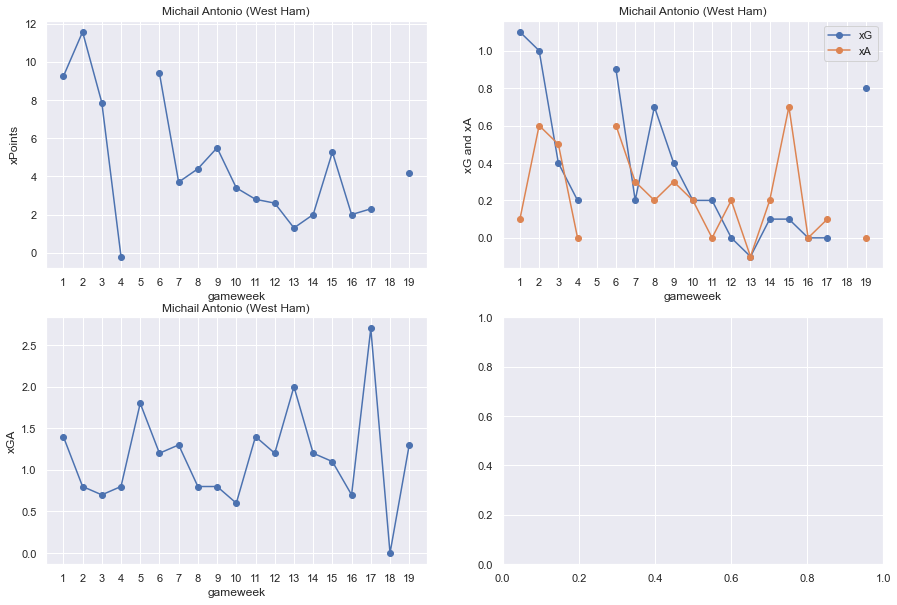

In [15]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 66.42013582685708
Predicted points next gameweek: 45.42992115020752


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 20 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,52,16.0,5.2,3.923888,4.903098,4.790074,0.000000,28.077274,1.720739
256,Cancelo,Manchester City,69,18.0,6.3,6.002212,6.336854,6.521600,3.451524,36.069452,2.285003
142,James,Chelsea,64,15.0,6.0,5.206565,4.614553,6.113020,4.445362,33.966058,2.058076
237,Alexander-Arnold,Liverpool,83,16.0,7.9,7.149678,9.084502,7.890557,5.108371,42.765125,2.481689
144,Gallagher,Crystal Palace,61,17.0,5.4,4.634262,4.065887,5.102025,4.761030,40.179000,1.876358
138,Mount,Chelsea,77,16.0,5.6,5.134162,5.559288,4.856182,5.107860,40.957818,1.850224
250,Gündogan,Manchester City,73,13.0,5.3,5.521052,4.450076,5.343621,3.385853,36.543822,2.043433
233,Salah,Liverpool,130,18.0,9.4,7.901461,6.409438,6.852667,5.319105,46.362981,2.191471
450,Dennis,Watford,60,15.0,5.6,4.221733,4.600000,5.335500,3.822144,41.718092,1.723515



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 20 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,3.5,3.831539,NaN,5.978244,3.630796,37.550732,1.892262
145,Gilmour,Norwich City,44,11.0,2.3,2.589319,2.525500,2.644938,2.430882,22.621855,1.234410
425,Johnson,West Ham,40,9.0,3.1,2.913687,0.300000,2.505422,3.326526,29.100996,1.456843
491,Livramento,Southampton,44,18.0,3.0,2.873609,2.365817,2.455706,2.869847,33.871694,1.369939


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)